In [1]:
#importing libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
#from sklearn.metrics import plot_roc_curve

#for warning
from warnings import filterwarnings
filterwarnings("ignore")  #to remove warnings

In [2]:
#loading dataset

data=pd.read_csv("diabetes.csv")


In [3]:
#to build ML model to predict diabetes in patients
######EDA on dataset######
print(data.shape,"\n")  #shape of data
print(data.ndim,"\n")   #n dimensions of data
print(data.size,"\n")   #size of data
print(data.isna().sum(),"\n") #returns total NA values
print(data.info(),"\n")  #summary of dataframe

(768, 9) 

2 

6912 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-

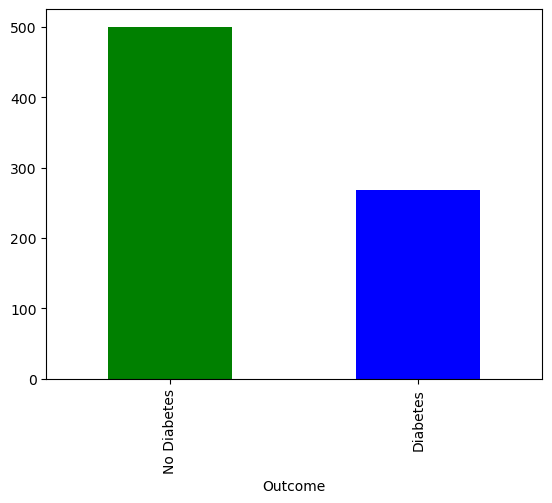

In [4]:
####Visualizing data#####
data["Outcome"].value_counts().plot(kind="bar",color=["green","blue"])
plt.xticks(np.arange(2),('No Diabetes','Diabetes'));

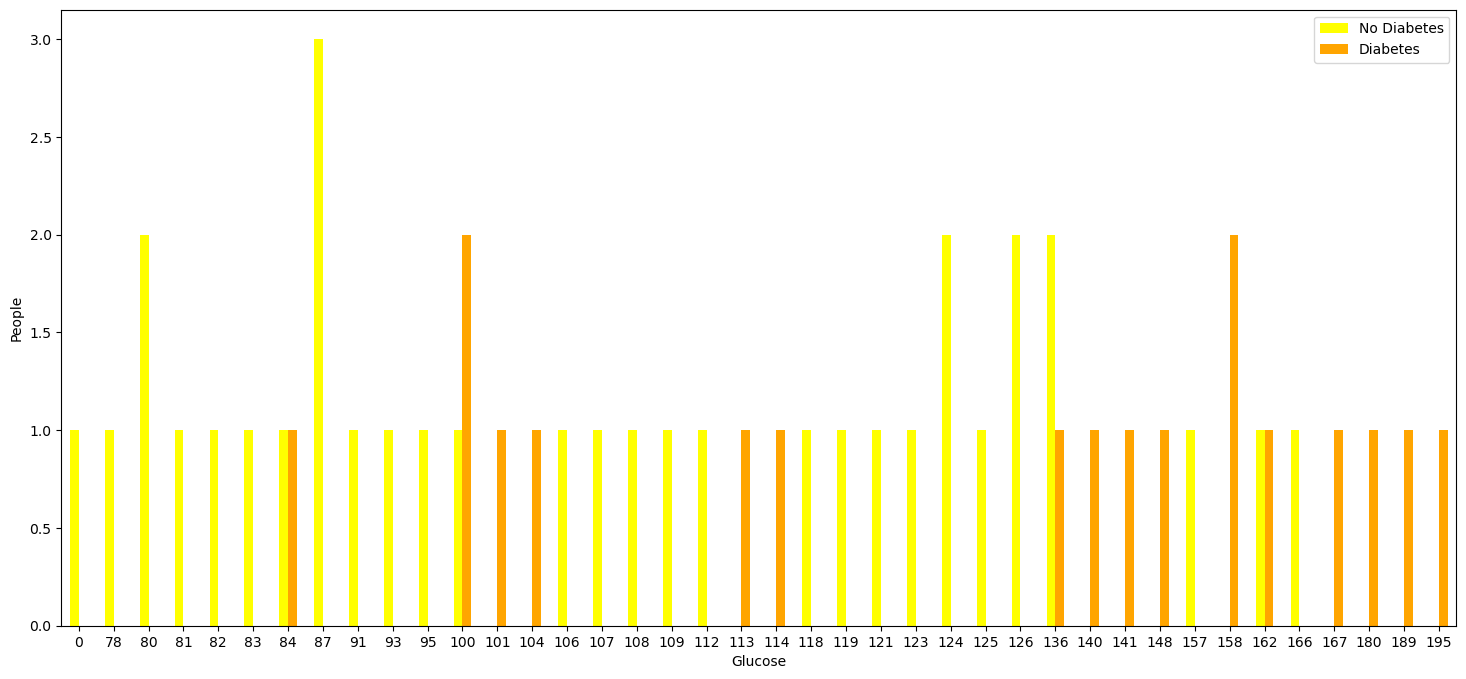

In [5]:
#comparing glucose with outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","orange"])
plt.ylabel("People");
plt.xticks(rotation=0);
plt.legend(['No Diabetes','Diabetes']);

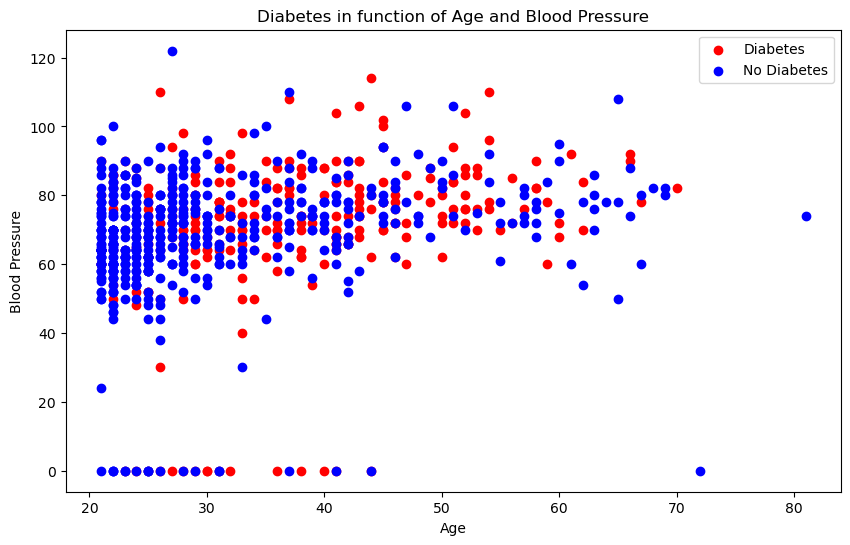

In [6]:
#Blood pressure and age of those who have diabetes

plt.figure(figsize=(10,6))

#Scatter with Positive (Outcome=1)
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

#Scatter with Negative (Outcome=0)
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="Blue");

plt.legend(["Diabetes","No Diabetes"])
plt.title("Diabetes in function of Age and Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure");

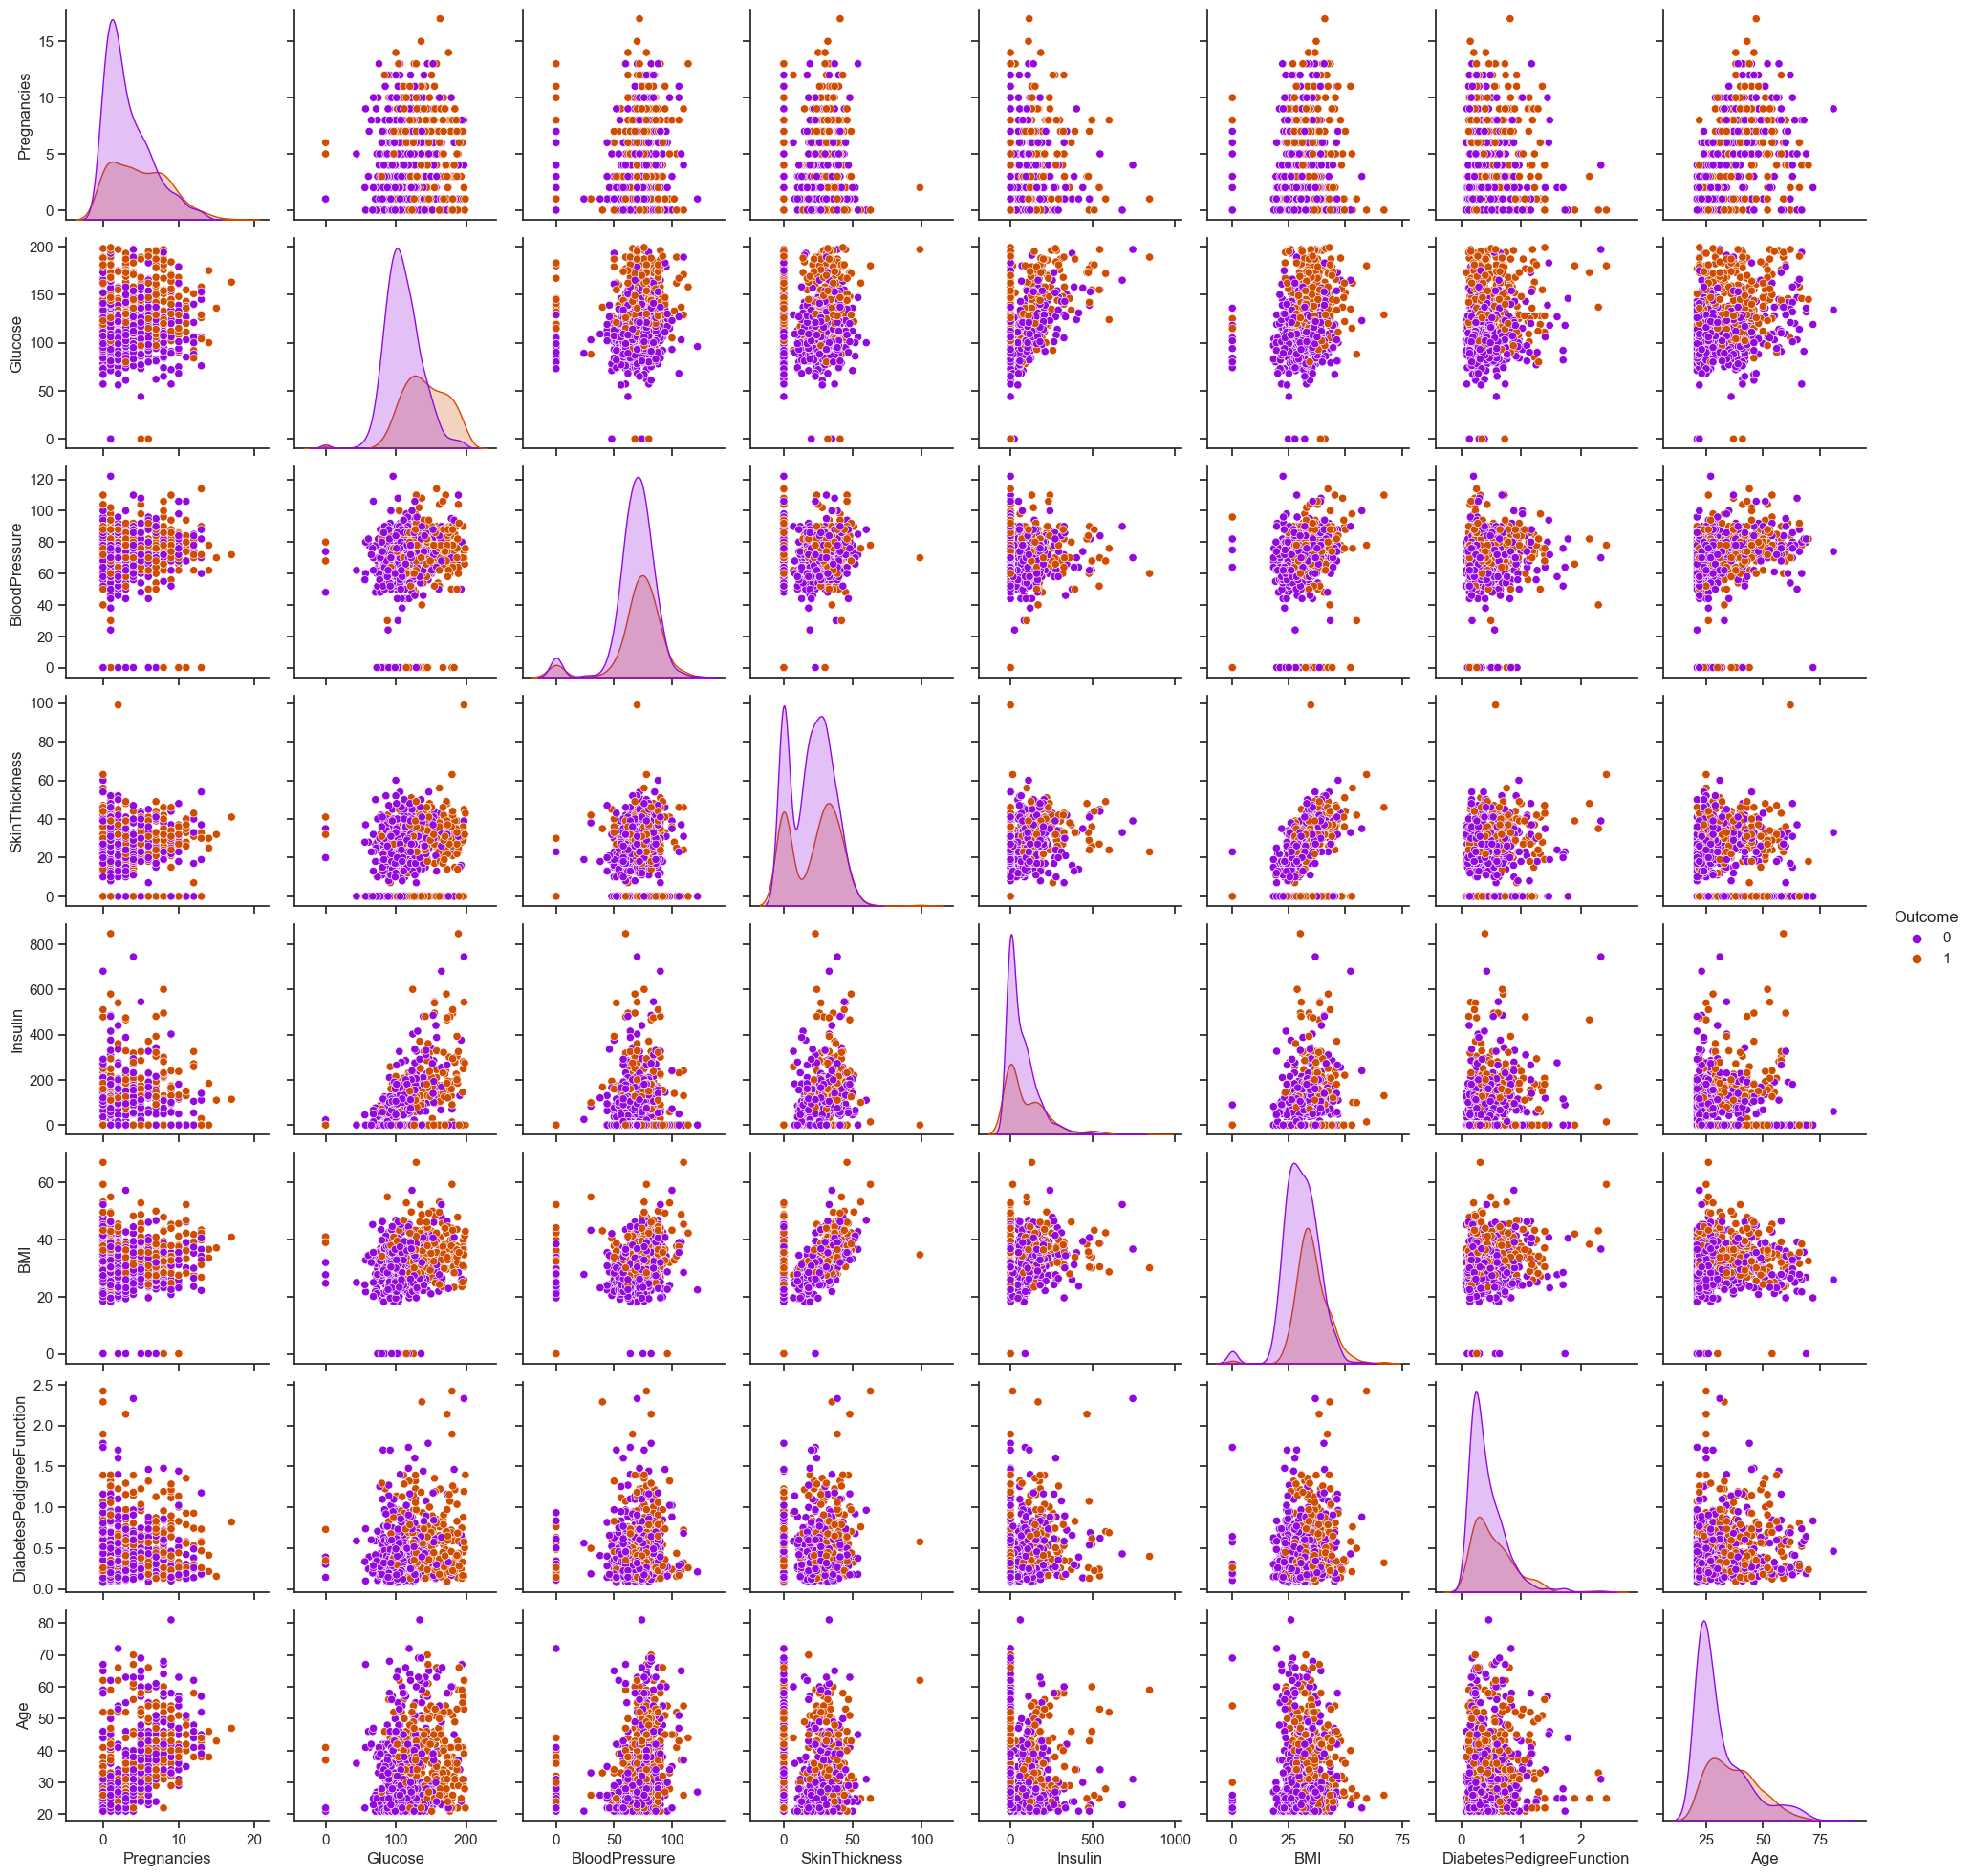

In [7]:
#Pairplotting of Dataframe
sns.set(style="ticks",color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

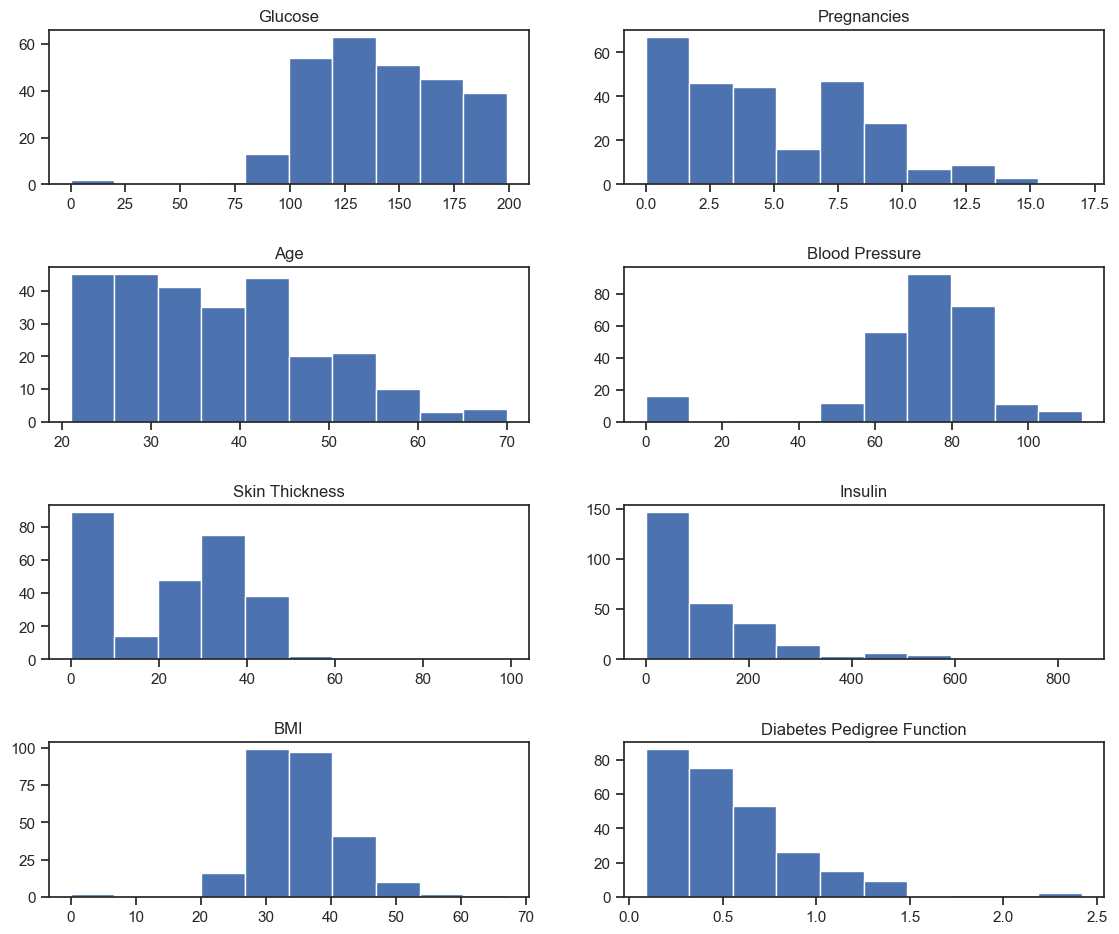

In [8]:
#histogram of all columns positive for Diabetes (Outcome=1)
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(12,10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title("Age")
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title("Blood Pressure")
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title("Skin Thickness")
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title("Insulin")
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title("BMI")
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title("Diabetes Pedigree Function")
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

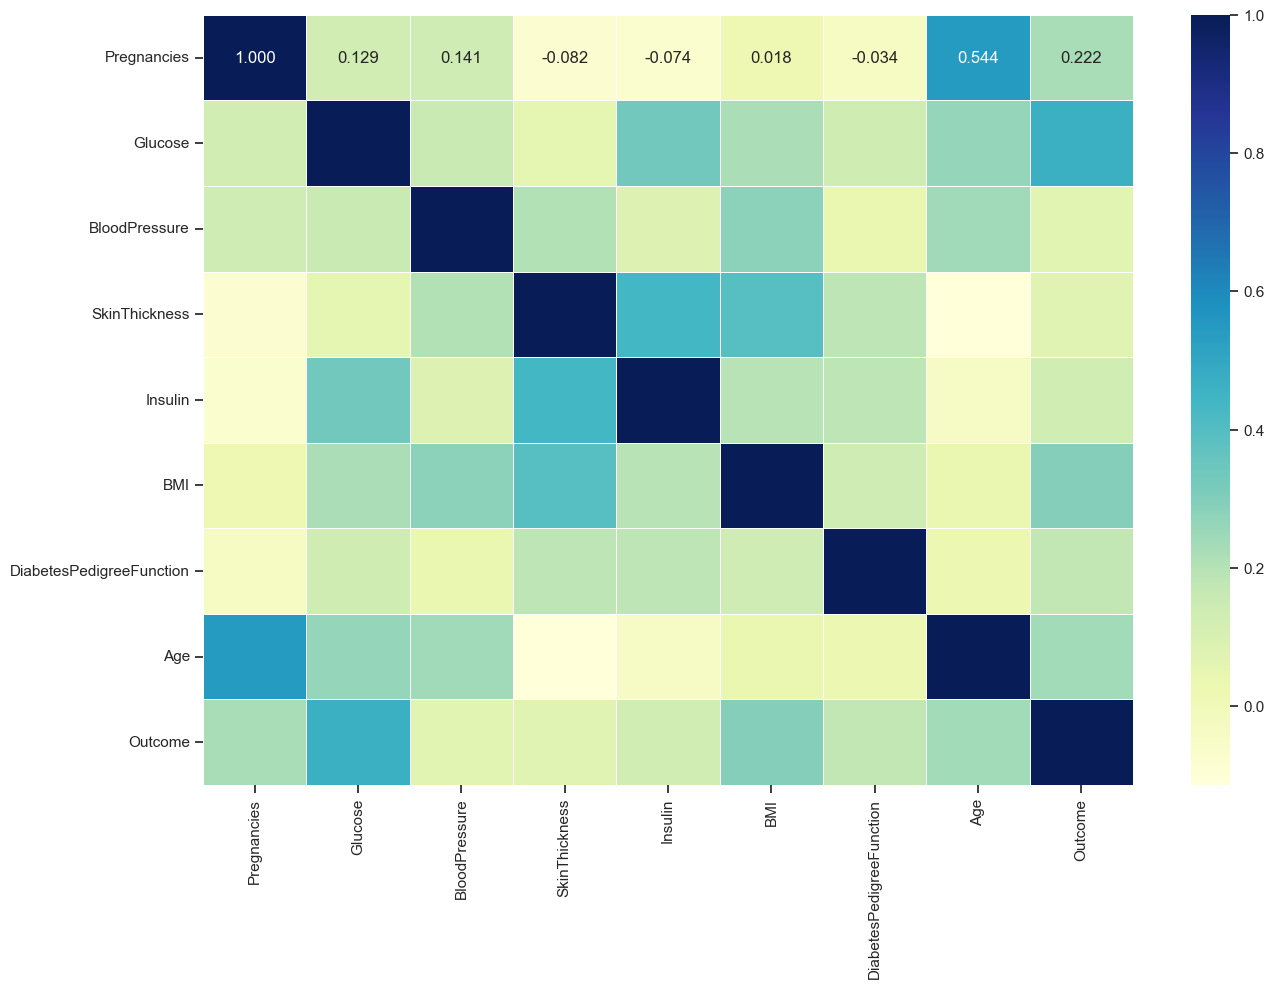

In [9]:
#correlation matrix between columns
corr_matrix = data.corr()
#print(corr_matrix)
fig,ax = plt.subplots(figsize=(15,10))
a = sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt=".3f",cmap="YlGnBu")

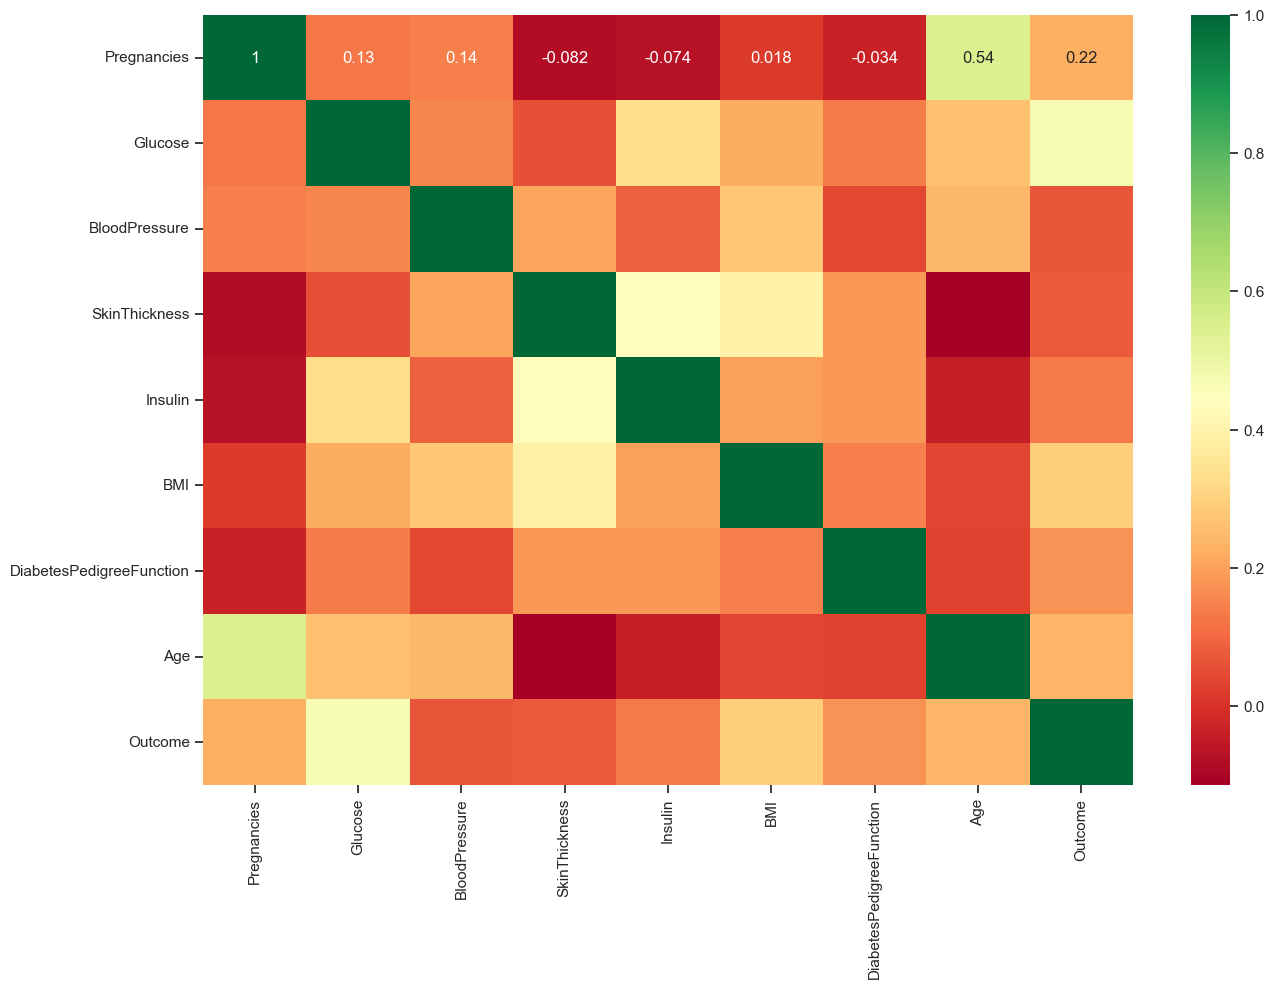

In [10]:
#get correlations of each feature in the dataset
corr_mat = data.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(15,10))
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [11]:
### MODELLING AND TRAINING ###
#random data shufflein
data.sample(frac=1)

#splitting the data
X= data.drop("Outcome",axis=1)
y= data["Outcome"]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [12]:
#Logistic Regression Model
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
#Evaluation
log_reg=log_reg.score(X_test,y_test)

In [13]:
#KNN Model
knn=KNeighborsClassifier()
knn.fit(X_train,y_train);
#Evaluation
knn=knn.score(X_test,y_test)

In [14]:
#Random Forest Classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
#Evaluation
clf=clf.score(X_test,y_test)

In [15]:
#Support Vector Machine
svm=SVC()
svm.fit(X_train,y_train)
#Evaluation
svm=svm.score(X_test,y_test)

          Logistic Regression       KNN  Random Forest Classifier  \
accuracy             0.831169  0.779221                  0.785714   

          Support Vector Machine  
accuracy                0.811688  


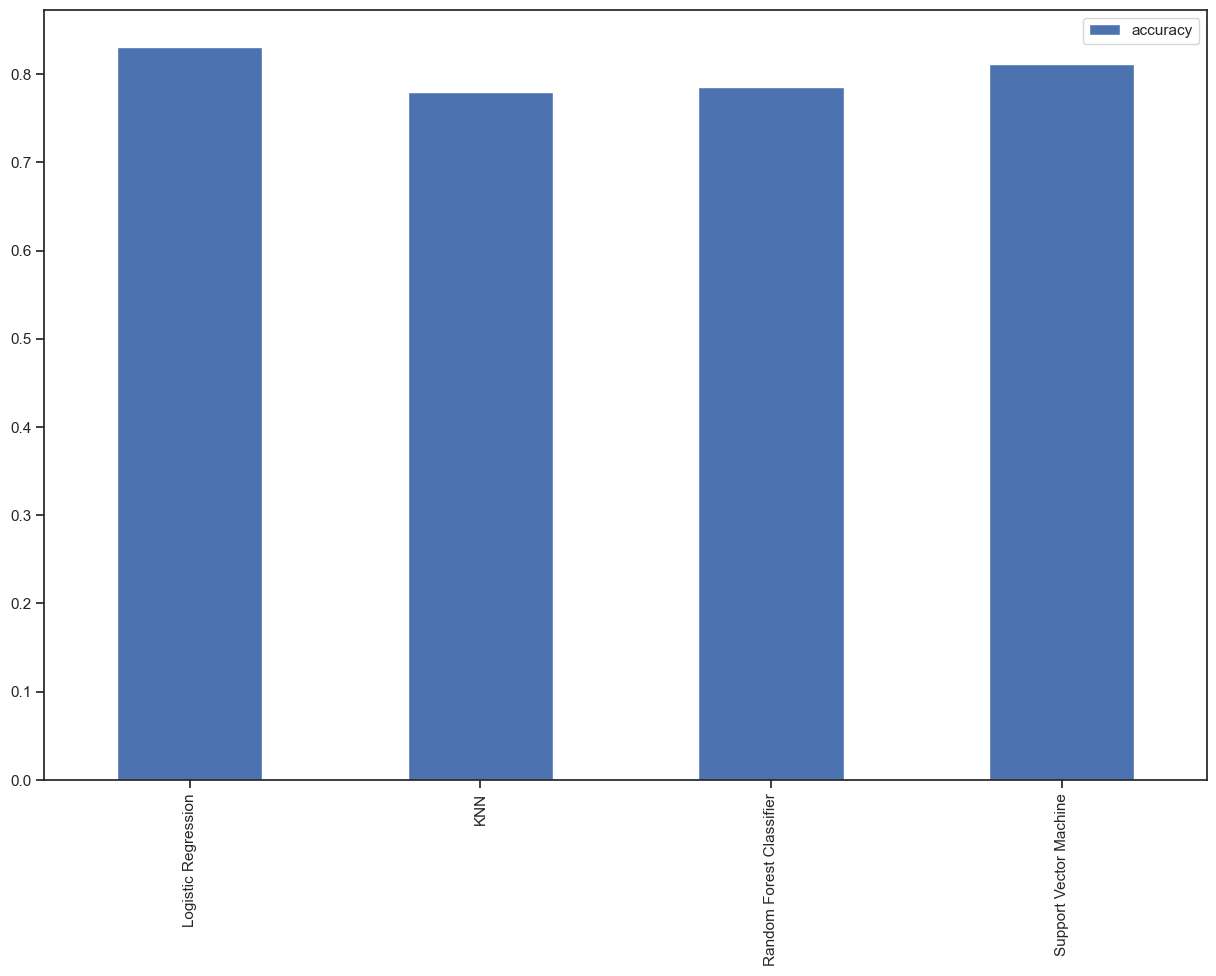

In [16]:
#Compare models
model_compare=pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                            "Support Vector Machine":svm,},index=["accuracy"])
print(model_compare)
model_compare.T.plot.bar(figsize=(15,10));

In [17]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
print(score*100)            #0.831169  ->   0.837662

Fitting 5 folds for each of 20 candidates, totalling 100 fits
83.76623376623377


In [19]:
#Evaluate Model (Make Prediction)
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [20]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       111
           1       0.80      0.56      0.66        43

    accuracy                           0.84       154
   macro avg       0.82      0.75      0.78       154
weighted avg       0.83      0.84      0.83       154



In [22]:
#LOADING MODEL
import pickle
# Save trained model to file
filename = 'model_diabetes.sav'
pickle.dump(rs_log_reg, open(filename, 'wb'))